In [1]:
# !pip install eli5 pdpbox

In [363]:
# Let's do our imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import pandas as pd
import os
import warnings
import urllib.request
from scipy.stats import randint, uniform
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, validation_curve, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from glob import glob
%matplotlib inline

In [3]:
# Now we have to get our data. First Step was to download to the local system.
# Now let's get it into the notebook
# Kind of clunky, but this works for me: see what your cwd is
import os
rect = os.getcwd()
print(rect)

C:\Users\Raul\GitHub\DS-Unit-2-Data-Storytelling-Project


In [4]:
rawoscar = pd.read_csv('Projectdata/academy_awards.csv', usecols=[*range(0,5)], encoding='latin-1')

rawoscar.head(30)

,Year,Category,Nominee,Additional Info,Won?
0,2010 (83rd),Actor -- Leading Role,Javier Bardem,Biutiful {'Uxbal'},NO
1,2010 (83rd),Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},NO
2,2010 (83rd),Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},NO
3,2010 (83rd),Actor -- Leading Role,Colin Firth,The King's Speech {'King George VI'},YES
4,2010 (83rd),Actor -- Leading Role,James Franco,127 Hours {'Aron Ralston'},NO
5,2010 (83rd),Actor -- Supporting Role,Christian Bale,The Fighter {'Dicky Eklund'},YES
6,2010 (83rd),Actor -- Supporting Role,John Hawkes,Winter's Bone {'Teardrop'},NO
7,2010 (83rd),Actor -- Supporting Role,Jeremy Renner,The Town {'James Coughlin'},NO
8,2010 (83rd),Actor -- Supporting Role,Mark Ruffalo,The Kids Are All Right {'Paul'},NO
9,2010 (83rd),Actor -- Supporting Role,Geoffrey Rush,The King's Speech {'Lionel Logue'},NO


In [5]:
rawoscar.shape

(10137, 5)

In [6]:
rawoscar['Won?'].describe()

count     10137
unique       16
top          NO
freq       7168
Name: Won?, dtype: object

In [7]:
rawoscar['Won?'].replace(['YES','NO'], [1, 0], inplace=True)

rawoscar.head(10)

,Year,Category,Nominee,Additional Info,Won?
0,2010 (83rd),Actor -- Leading Role,Javier Bardem,Biutiful {'Uxbal'},0
1,2010 (83rd),Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},0
2,2010 (83rd),Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},0
3,2010 (83rd),Actor -- Leading Role,Colin Firth,The King's Speech {'King George VI'},1
4,2010 (83rd),Actor -- Leading Role,James Franco,127 Hours {'Aron Ralston'},0
5,2010 (83rd),Actor -- Supporting Role,Christian Bale,The Fighter {'Dicky Eklund'},1
6,2010 (83rd),Actor -- Supporting Role,John Hawkes,Winter's Bone {'Teardrop'},0
7,2010 (83rd),Actor -- Supporting Role,Jeremy Renner,The Town {'James Coughlin'},0
8,2010 (83rd),Actor -- Supporting Role,Mark Ruffalo,The Kids Are All Right {'Paul'},0
9,2010 (83rd),Actor -- Supporting Role,Geoffrey Rush,The King's Speech {'Lionel Logue'},0


In [8]:
rawoscar['Category'].unique()

array(['Actor -- Leading Role', 'Actor -- Supporting Role',
       'Actress -- Leading Role', 'Actress -- Supporting Role',
       'Animated Feature Film', 'Art Direction', 'Cinematography',
       'Costume Design', 'Directing', 'Documentary (Feature)',
       'Documentary (Short Subject)', 'Film Editing',
       'Foreign Language Film', 'Makeup', 'Music (Scoring)',
       'Music (Song)', 'Best Picture', 'Short Film (Animated)',
       'Short Film (Live Action)', 'Sound', 'Sound Editing',
       'Visual Effects', 'Writing', 'Honorary Award',
       'Irving G. Thalberg Memorial Award',
       'Scientific and Technical (Scientific and Engineering Award)',
       'Scientific and Technical (Technical Achievement Award)',
       'Scientific and Technical (Bonner Medal)',
       'Jean Hersholt Humanitarian Award',
       'Scientific and Technical (Gordon E. Sawyer Award)',
       'Scientific and Technical (Academy Award of Merit)',
       'Scientific and Technical (Special Awards)',
       '

In [137]:
# mainrows = ['Actor -- Leading Role', 'Actor -- Supporting Role', 'Actress -- Leading Role', 'Actress -- Supporting Role', 
#             'Directing', 'Film Editing', 'Cinematography', 'Art Direction', 'Costume Design', 'Makeup', 
#             'Sound', 'Sound Editing', 'Music (Scoring)','Music (Song)', 'Best Picture', 'Writing']

acting = ['Actor -- Leading Role', 'Actor -- Supporting Role', 'Actress -- Leading Role', 'Actress -- Supporting Role']

directing = ['Directing']

writing = ['Writing']

cinemat = ['Cinematography']

editing = ['Film Editing']

proddesign = ['Art Direction', 'Costume Design', 'Makeup']

sound = ['Sound', 'Sound Editing', 'Music (Scoring)', 'Music (Song)']

maincat = acting + directing + writing + cinemat + editing + proddesign + sound

bp = ['Best Picture']

In [138]:
maincat

['Actor -- Leading Role',
 'Actor -- Supporting Role',
 'Actress -- Leading Role',
 'Actress -- Supporting Role',
 'Directing',
 'Writing',
 'Cinematography',
 'Film Editing',
 'Art Direction',
 'Costume Design',
 'Makeup',
 'Sound',
 'Sound Editing',
 'Music (Scoring)',
 'Music (Song)']

In [139]:
oscaract = rawoscar[rawoscar['Category'].isin(acting)]

oscaract.sample(10)

,Year,Category,Nominee,Additional Info,Won?
2878,1988 (61st),Actress -- Supporting Role,Sigourney Weaver,Working Girl {'Katharine Parker'},0
2504,1991 (64th),Actress -- Leading Role,Bette Midler,For the Boys {'Dixie Leonard'},0
4424,1975 (48th),Actor -- Supporting Role,Burgess Meredith,The Day of the Locust {'Harry'},0
4317,1976 (49th),Actress -- Leading Role,Sissy Spacek,Carrie {'Carrie White'},0
1707,1997 (70th),Actor -- Supporting Role,Burt Reynolds,Boogie Nights {'Jack Horner'},0
7851,1947 (20th),Actress -- Leading Role,Susan Hayward,Smash-Up--The Story of a Woman {'Angie'},0
1972,1995 (68th),Actor -- Supporting Role,James Cromwell,Babe {'Farmer Hoggett'},0
2984,1987 (60th),Actor -- Leading Role,William Hurt,Broadcast News {'Tom Grunick'},0
663,2005 (78th),Actress -- Leading Role,Charlize Theron,North Country {'Josey Aimes'},0
3597,1982 (55th),Actress -- Supporting Role,Lesley Ann Warren,Victor/Victoria {'Norma'},0


In [140]:
oscarmain = rawoscar[rawoscar['Category'].isin(maincat + bp)]

oscarmain.sample(10)


,Year,Category,Nominee,Additional Info,Won?
4826,1972 (45th),Music (Scoring),Lady Sings the Blues,Adaptation Score by Gil Askey,0
8251,1944 (17th),Actress -- Supporting Role,Agnes Moorehead,Mrs. Parkington {'Aspacia Conti'},0
4973,1971 (44th),Writing,Klute,"Andy Lewis, Dave Lewis",0
8238,1944 (17th),Actor -- Supporting Role,Barry Fitzgerald,Going My Way {'Father Fitzgibbon'},1
8630,1942 (15th),Art Direction,This above All,"Art Direction: Richard Day, Joseph Wright; Int...",1
5009,1970 (43rd),Cinematography,Patton,Fred Koenekamp,0
9349,1938 (11th),Film Editing,Alexander's Ragtime Band,Barbara McLean,0
7106,1953 (26th),Actress -- Supporting Role,Thelma Ritter,Pickup on South Street {'Moe'},0
3987,1979 (52nd),Film Editing,Kramer vs. Kramer,Jerry Greenberg,0
3678,1982 (55th),Writing,Missing,"Costa-Gavras, Donald Stewart",1


In [141]:
oscarmain.shape

(7056, 5)

In [142]:
om =oscarmain.copy()
om['Film Name'] = 'Film Name Here'

om.head()

C:\Users\Raul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Category,Nominee,Additional Info,Won?,Film Name
0,2010 (83rd),Actor -- Leading Role,Javier Bardem,Biutiful {'Uxbal'},0,Film Name Here
1,2010 (83rd),Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},0,Film Name Here
2,2010 (83rd),Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},0,Film Name Here
3,2010 (83rd),Actor -- Leading Role,Colin Firth,The King's Speech {'King George VI'},1,Film Name Here
4,2010 (83rd),Actor -- Leading Role,James Franco,127 Hours {'Aron Ralston'},0,Film Name Here


In [143]:
om0 = om.copy()

om0.head()

,Year,Category,Nominee,Additional Info,Won?,Film Name
0,2010 (83rd),Actor -- Leading Role,Javier Bardem,Biutiful {'Uxbal'},0,Film Name Here
1,2010 (83rd),Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},0,Film Name Here
2,2010 (83rd),Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},0,Film Name Here
3,2010 (83rd),Actor -- Leading Role,Colin Firth,The King's Speech {'King George VI'},1,Film Name Here
4,2010 (83rd),Actor -- Leading Role,James Franco,127 Hours {'Aron Ralston'},0,Film Name Here


In [144]:
om0act = om0[om0['Category'].isin(actingrows)]

om0act['Film Name'] = om0act['Additional Info'].str.replace(r"\{.*\}","")

om0act['Film Name'] = om0act['Film Name'] + '(' + om0act['Year'].str.replace(r"\s*\(.*\)",")") 

# om0act['Nominations'] = om0act.groupby('Film Name')['Film Name'].transform('count')

om0act.head()

C:\Users\Raul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Raul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Year,Category,Nominee,Additional Info,Won?,Film Name
0,2010 (83rd),Actor -- Leading Role,Javier Bardem,Biutiful {'Uxbal'},0,Biutiful (2010)
1,2010 (83rd),Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},0,True Grit (2010)
2,2010 (83rd),Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},0,The Social Network (2010)
3,2010 (83rd),Actor -- Leading Role,Colin Firth,The King's Speech {'King George VI'},1,The King's Speech (2010)
4,2010 (83rd),Actor -- Leading Role,James Franco,127 Hours {'Aron Ralston'},0,127 Hours (2010)


In [145]:
om0else = om0[om0['Category'].isin(actingrows) == False]

om0else['Film Name'] = om0else['Nominee']

om0else['Film Name'] = om0else['Film Name'] + ' (' + om0else['Year'].str.replace(r"\s*\(.*\)",")") 

# om0else['Nominations'] = om0else.groupby('Film Name')['Film Name'].transform('count')

om0else.sample(10)

C:\Users\Raul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Raul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Year,Category,Nominee,Additional Info,Won?,Film Name
7436,1951 (24th),Music (Song),Here Comes the Groom,Music by Hoagy Carmichael; Lyrics by Johnny Me...,1,Here Comes the Groom (1951)
2643,1990 (63rd),Cinematography,Dick Tracy,Vittorio Storaro,0,Dick Tracy (1990)
8151,1945 (18th),Music (Scoring),Rhapsody in Blue,"Ray Heindorf, Max Steiner",0,Rhapsody in Blue (1945)
9393,1938 (11th),Best Picture,Test Pilot,Metro-Goldwyn-Mayer,0,Test Pilot (1938)
9323,1938 (11th),Art Direction,Algiers,Alexander Toluboff,0,Algiers (1938)
584,2006 (79th),Makeup,Pan's Labyrinth,David Martí and Montse Ribé,1,Pan's Labyrinth (2006)
9171,1939 (12th),Art Direction,Man of Conquest,John Victor Mackay,0,Man of Conquest (1939)
7697,1949 (22nd),Writing,Sands of Iwo Jima,Harry Brown,0,Sands of Iwo Jima (1949)
5419,1967 (40th),Sound Editing,The Dirty Dozen,John Poyner,1,The Dirty Dozen (1967)
1481,1999 (72nd),Makeup,Austin Powers: The Spy Who Shagged Me,"Michèle Burke, Mike Smithson",0,Austin Powers: The Spy Who Shagged Me (1999)


In [146]:
om1 = pd.concat([om0act, om0else])

om1 = om1.sort_index(ascending=True)

om1.head(30)

,Year,Category,Nominee,Additional Info,Won?,Film Name
0,2010 (83rd),Actor -- Leading Role,Javier Bardem,Biutiful {'Uxbal'},0,Biutiful (2010)
1,2010 (83rd),Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},0,True Grit (2010)
2,2010 (83rd),Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},0,The Social Network (2010)
3,2010 (83rd),Actor -- Leading Role,Colin Firth,The King's Speech {'King George VI'},1,The King's Speech (2010)
4,2010 (83rd),Actor -- Leading Role,James Franco,127 Hours {'Aron Ralston'},0,127 Hours (2010)
5,2010 (83rd),Actor -- Supporting Role,Christian Bale,The Fighter {'Dicky Eklund'},1,The Fighter (2010)
6,2010 (83rd),Actor -- Supporting Role,John Hawkes,Winter's Bone {'Teardrop'},0,Winter's Bone (2010)
7,2010 (83rd),Actor -- Supporting Role,Jeremy Renner,The Town {'James Coughlin'},0,The Town (2010)
8,2010 (83rd),Actor -- Supporting Role,Mark Ruffalo,The Kids Are All Right {'Paul'},0,The Kids Are All Right (2010)
9,2010 (83rd),Actor -- Supporting Role,Geoffrey Rush,The King's Speech {'Lionel Logue'},0,The King's Speech (2010)


In [147]:
om1.head(30)['Film Name'].value_counts()

The King's Speech (2010)                              5
True Grit (2010)                                      4
The Fighter (2010)                                    3
Inception (2010)                                      2
Black Swan (2010)                                     2
The Kids Are All Right (2010)                         2
Winter's Bone (2010)                                  2
The Social Network (2010)                             2
Blue Valentine (2010)                                 1
Animal Kingdom (2010)                                 1
The Town (2010)                                       1
Biutiful (2010)                                       1
127 Hours (2010)                                      1
Alice in Wonderland (2010)                            1
Harry Potter and the Deathly Hallows Part 1 (2010)    1
Rabbit Hole (2010)                                    1
Name: Film Name, dtype: int64

In [148]:
om2 = om1.copy()

om2['Total Nominations'] = om2.groupby('Film Name')['Film Name'].transform('count')

om2.head(30)

,Year,Category,Nominee,Additional Info,Won?,Film Name,Total Nominations
0,2010 (83rd),Actor -- Leading Role,Javier Bardem,Biutiful {'Uxbal'},0,Biutiful (2010),1.0
1,2010 (83rd),Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},0,True Grit (2010),10.0
2,2010 (83rd),Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},0,The Social Network (2010),8.0
3,2010 (83rd),Actor -- Leading Role,Colin Firth,The King's Speech {'King George VI'},1,The King's Speech (2010),12.0
4,2010 (83rd),Actor -- Leading Role,James Franco,127 Hours {'Aron Ralston'},0,127 Hours (2010),6.0
5,2010 (83rd),Actor -- Supporting Role,Christian Bale,The Fighter {'Dicky Eklund'},1,The Fighter (2010),7.0
6,2010 (83rd),Actor -- Supporting Role,John Hawkes,Winter's Bone {'Teardrop'},0,Winter's Bone (2010),4.0
7,2010 (83rd),Actor -- Supporting Role,Jeremy Renner,The Town {'James Coughlin'},0,The Town (2010),1.0
8,2010 (83rd),Actor -- Supporting Role,Mark Ruffalo,The Kids Are All Right {'Paul'},0,The Kids Are All Right (2010),4.0
9,2010 (83rd),Actor -- Supporting Role,Geoffrey Rush,The King's Speech {'Lionel Logue'},0,The King's Speech (2010),12.0


In [149]:
om3 = om2.copy()
om3bestpic = om3[om3['Category'].isin(bp)]

om3bestpic.head(20)

,Year,Category,Nominee,Additional Info,Won?,Film Name,Total Nominations
75,2010 (83rd),Best Picture,Black Swan,"Mike Medavoy, Brian Oliver and Scott Franklin,...",0,Black Swan (2010),5.0
76,2010 (83rd),Best Picture,The Fighter,"David Hoberman, Todd Lieberman and Mark Wahlbe...",0,The Fighter (2010),7.0
77,2010 (83rd),Best Picture,Inception,"Emma Thomas and Christopher Nolan, Producers",0,Inception (2010),7.0
78,2010 (83rd),Best Picture,The Kids Are All Right,"Gary Gilbert, Jeffrey Levy-Hinte and Celine Ra...",0,The Kids Are All Right (2010),4.0
79,2010 (83rd),Best Picture,The King's Speech,"Iain Canning, Emile Sherman and Gareth Unwin, ...",1,The King's Speech (2010),12.0
80,2010 (83rd),Best Picture,127 Hours,"Christian Colson, Danny Boyle and John Smithso...",0,127 Hours (2010),6.0
81,2010 (83rd),Best Picture,The Social Network,"Scott Rudin, Dana Brunetti, Michael De Luca an...",0,The Social Network (2010),8.0
82,2010 (83rd),Best Picture,Toy Story 3,"Darla K. Anderson, Producer",0,Toy Story 3 (2010),4.0
83,2010 (83rd),Best Picture,True Grit,"Scott Rudin, Ethan Coen and Joel Coen, Producers",0,True Grit (2010),10.0
84,2010 (83rd),Best Picture,Winter's Bone,"Anne Rosellini and Alix Madigan-Yorkin, Producers",0,Winter's Bone (2010),4.0


In [150]:
om3bestpic.tail(20)

,Year,Category,Nominee,Additional Info,Won?,Film Name,Total Nominations
9942,1931/32 (5th),Best Picture,Shanghai Express,Paramount Publix,0,Shanghai Express (1931/32),3.0
9943,1931/32 (5th),Best Picture,The Smiling Lieutenant,Paramount Publix,0,The Smiling Lieutenant (1931/32),1.0
9993,1930/31 (4th),Best Picture,Cimarron,RKO Radio,1,Cimarron (1930/31),7.0
9994,1930/31 (4th),Best Picture,East Lynne,Fox,0,East Lynne (1930/31),1.0
9995,1930/31 (4th),Best Picture,The Front Page,The Caddo Company,0,The Front Page (1930/31),3.0
9996,1930/31 (4th),Best Picture,Skippy,Paramount Publix,0,Skippy (1930/31),4.0
9997,1930/31 (4th),Best Picture,Trader Horn,Metro-Goldwyn-Mayer,0,Trader Horn (1930/31),1.0
10045,1929/30 (3rd),Best Picture,All Quiet on the Western Front,Universal,1,All Quiet on the Western Front (1929/30),3.0
10046,1929/30 (3rd),Best Picture,The Big House,Cosmopolitan,0,The Big House (1929/30),4.0
10047,1929/30 (3rd),Best Picture,Disraeli,Warner Bros.,0,Disraeli (1929/30),3.0


In [151]:
om3bestpic.reset_index()

,index,Year,Category,Nominee,Additional Info,Won?,Film Name,Total Nominations
0,75,2010 (83rd),Best Picture,Black Swan,"Mike Medavoy, Brian Oliver and Scott Franklin,...",0,Black Swan (2010),5.0
1,76,2010 (83rd),Best Picture,The Fighter,"David Hoberman, Todd Lieberman and Mark Wahlbe...",0,The Fighter (2010),7.0
2,77,2010 (83rd),Best Picture,Inception,"Emma Thomas and Christopher Nolan, Producers",0,Inception (2010),7.0
3,78,2010 (83rd),Best Picture,The Kids Are All Right,"Gary Gilbert, Jeffrey Levy-Hinte and Celine Ra...",0,The Kids Are All Right (2010),4.0
4,79,2010 (83rd),Best Picture,The King's Speech,"Iain Canning, Emile Sherman and Gareth Unwin, ...",1,The King's Speech (2010),12.0
5,80,2010 (83rd),Best Picture,127 Hours,"Christian Colson, Danny Boyle and John Smithso...",0,127 Hours (2010),6.0
6,81,2010 (83rd),Best Picture,The Social Network,"Scott Rudin, Dana Brunetti, Michael De Luca an...",0,The Social Network (2010),8.0
7,82,2010 (83rd),Best Picture,Toy Story 3,"Darla K. Anderson, Producer",0,Toy Story 3 (2010),4.0
8,83,2010 (83rd),Best Picture,True Grit,"Scott Rudin, Ethan Coen and Joel Coen, Producers",0,True Grit (2010),10.0
9,84,2010 (83rd),Best Picture,Winter's Bone,"Anne Rosellini and Alix Madigan-Yorkin, Producers",0,Winter's Bone (2010),4.0


In [152]:
om3bestpic.iloc[484, 5] = ['Wings (1927/28)']
om3bestpic.iloc[483, 5] = ['7th Heaven (1927/28)']
om3bestpic.iloc[482, 5] = ['The Racket (1927/28)']
om3bestpic.iloc[481, 5] = ['The Patriot (1928/29)']
om3bestpic.iloc[480, 5] = ['Hollywood Revue (1928/29)']
om3bestpic.iloc[479, 5] = ['The Broadway Melody (1928/29)']
om3bestpic.iloc[478, 5] = ['In Old Arizona (1928/29)']

om3bestpic.tail(10)

C:\Users\Raul\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Year,Category,Nominee,Additional Info,Won?,Film Name,Total Nominations
10048,1929/30 (3rd),Best Picture,The Divorcee,Metro-Goldwyn-Mayer,0,The Divorcee (1929/30),3.0
10049,1929/30 (3rd),Best Picture,The Love Parade,Paramount Famous Lasky,0,The Love Parade (1929/30),4.0
10087,1928/29 (2nd),Best Picture,Feature Productions,Alibi,0,Feature Productions (1928/29),1.0
10088,1928/29 (2nd),Best Picture,Fox,In Old Arizona,0,In Old Arizona (1928/29),1.0
10089,1928/29 (2nd),Best Picture,Metro-Goldwyn-Mayer,The Broadway Melody,1,The Broadway Melody (1928/29),2.0
10090,1928/29 (2nd),Best Picture,Metro-Goldwyn-Mayer,Hollywood Revue,0,Hollywood Revue (1928/29),2.0
10091,1928/29 (2nd),Best Picture,Paramount Famous Lasky,The Patriot,0,The Patriot (1928/29),1.0
10117,1927/28 (1st),Best Picture,The Caddo Company,The Racket,0,The Racket (1927/28),1.0
10118,1927/28 (1st),Best Picture,Fox,7th Heaven,0,7th Heaven (1927/28),1.0
10119,1927/28 (1st),Best Picture,Paramount Famous Lasky,Wings,1,Wings (1927/28),1.0


In [153]:
om3bestpic.iloc[484, 5]

'Wings (1927/28)'

In [154]:
print(om3bestpic['Film Name'].nunique())

om3bestpic['Film Name'].unique()

485


array(['Black Swan (2010)', 'The Fighter (2010)', 'Inception (2010)',
       'The Kids Are All Right (2010)', "The King's Speech (2010)",
       '127 Hours (2010)', 'The Social Network (2010)',
       'Toy Story 3 (2010)', 'True Grit (2010)', "Winter's Bone (2010)",
       'Avatar (2009)', 'The Blind Side (2009)', 'District 9 (2009)',
       'An Education (2009)', 'The Hurt Locker (2009)',
       'Inglourious Basterds (2009)',
       "Precious: Based on the Novel 'Push' by Sapphire (2009)",
       'A Serious Man (2009)', 'Up (2009)', 'Up in the Air (2009)',
       'The Curious Case of Benjamin Button (2008)', 'Frost/Nixon (2008)',
       'Milk (2008)', 'The Reader (2008)', 'Slumdog Millionaire (2008)',
       'Atonement (2007)', 'Juno (2007)', 'Michael Clayton (2007)',
       'No Country for Old Men (2007)', 'There Will Be Blood (2007)',
       'Babel (2006)', 'The Departed (2006)',
       'Letters from Iwo Jima (2006)', 'Little Miss Sunshine (2006)',
       'The Queen (2006)', 'Brokeb

In [155]:
om3names = om3bestpic[['Film Name']]
om3names.head()

# om3names.to_csv('Projectdata/bestpicnames.csv')
# om3bestpic.to_csv('Projectdata/bestpicdf.csv')

,Film Name
75,Black Swan (2010)
76,The Fighter (2010)
77,Inception (2010)
78,The Kids Are All Right (2010)
79,The King's Speech (2010)


In [156]:
bestpicnoms = om3bestpic['Film Name'].unique()

In [157]:
om3bpn = om3[om3['Film Name'].isin(bestpicnoms)]

om3bpn.sample(20)

,Year,Category,Nominee,Additional Info,Won?,Film Name,Total Nominations
9839,1934 (7th),Sound,Imitation of Life,"Universal Studio Sound Department, Theodore So...",0,Imitation of Life (1934),2.0
5362,1967 (40th),Directing,Bonnie and Clyde,Arthur Penn,0,Bonnie and Clyde (1967),10.0
3776,1981 (54th),Best Picture,Raiders of the Lost Ark,"Frank Marshall, Producer",0,Raiders of the Lost Ark (1981),8.0
6237,1960 (33rd),Cinematography,The Apartment,Joseph LaShelle,0,The Apartment (1960),10.0
75,2010 (83rd),Best Picture,Black Swan,"Mike Medavoy, Brian Oliver and Scott Franklin,...",0,Black Swan (2010),5.0
1088,2002 (75th),Film Editing,The Pianist,Hervé de Luze,0,The Pianist (2002),7.0
9717,1935 (8th),Film Editing,Les Miserables,Barbara McLean,0,Les Miserables (1935),3.0
8953,1941 (14th),Writing,Here Comes Mr. Jordan,Harry Segall,1,Here Comes Mr. Jordan (1941),7.0
8655,1942 (15th),Directing,Wake Island,John Farrow,0,Wake Island (1942),4.0
1485,1999 (72nd),Music (Scoring),American Beauty,Thomas Newman,0,American Beauty (1999),8.0


In [177]:
om3bpn.head(50)

,Year,Category,Nominee,Additional Info,Won?,Film Name,Total Nominations
1,2010 (83rd),Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},0,True Grit (2010),10.0
2,2010 (83rd),Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},0,The Social Network (2010),8.0
3,2010 (83rd),Actor -- Leading Role,Colin Firth,The King's Speech {'King George VI'},1,The King's Speech (2010),12.0
4,2010 (83rd),Actor -- Leading Role,James Franco,127 Hours {'Aron Ralston'},0,127 Hours (2010),6.0
5,2010 (83rd),Actor -- Supporting Role,Christian Bale,The Fighter {'Dicky Eklund'},1,The Fighter (2010),7.0
6,2010 (83rd),Actor -- Supporting Role,John Hawkes,Winter's Bone {'Teardrop'},0,Winter's Bone (2010),4.0
8,2010 (83rd),Actor -- Supporting Role,Mark Ruffalo,The Kids Are All Right {'Paul'},0,The Kids Are All Right (2010),4.0
9,2010 (83rd),Actor -- Supporting Role,Geoffrey Rush,The King's Speech {'Lionel Logue'},0,The King's Speech (2010),12.0
10,2010 (83rd),Actress -- Leading Role,Annette Bening,The Kids Are All Right {'Nic'},0,The Kids Are All Right (2010),4.0
12,2010 (83rd),Actress -- Leading Role,Jennifer Lawrence,Winter's Bone {'Ree'},0,Winter's Bone (2010),4.0


In [159]:
om3bpn.shape

(3050, 7)

In [170]:
bpntable = pd.crosstab(om3bpn['Film Name'], om3bpn['Category'], margins=True)

bpntable.columns.name= ''
print(bpntable.shape)
bpntable.sample(10)

(483, 17)


,Actor -- Leading Role,Actor -- Supporting Role,Actress -- Leading Role,Actress -- Supporting Role,Art Direction,Best Picture,Cinematography,Costume Design,Directing,Film Editing,Makeup,Music (Scoring),Music (Song),Sound,Sound Editing,Writing,All
Film Name,,,,,,,,,,,,,,,,,
Platoon (1986),0,2,0,0,0,1,1,0,1,1,0,0,0,1,0,1,8
Alice Adams (1935),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
The Fighter (2010),0,1,0,2,0,1,0,0,1,1,0,0,0,0,0,1,7
Johnny Belinda (1948),1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,12
Captains Courageous (1937),1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,4
Witness for the Prosecution (1957),1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,6
Libeled Lady (1936),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
An Unmarried Woman (1978),0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,3
A Tale of Two Cities (1936),0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2


In [201]:
bpntable.sort_values(by=['All'])

,Actor -- Leading Role,Actor -- Supporting Role,Actress -- Leading Role,Actress -- Supporting Role,Art Direction,Best Picture,Cinematography,Costume Design,Directing,Film Editing,Makeup,Music (Scoring),Music (Song),Sound,Sound Editing,Writing,All
Film Name,,,,,,,,,,,,,,,,,
Smilin' Through (1932/33),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Alice Adams (1935),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Here Comes the Navy (1934),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
In Old Arizona (1928/29),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
The Ox-Bow Incident (1943),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
The Patriot (1928/29),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
The House of Rothschild (1934),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Libeled Lady (1936),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
One Foot in Heaven (1941),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [318]:
om4 = om3bpn.copy()

mask = om4['Category'].isin(bp)

om4 = om4[~mask]

om4['Total Nominations'] = om4.groupby('Film Name')['Film Name'].transform('count')
om4['Total Wins'] = om4.groupby(['Film Name'])['Won?'].transform('sum')

########

act4 = om4[om4['Category'].isin(acting)]

act4['Acting Noms'] = act4.groupby(['Film Name'])['Film Name'].transform('count')
act4['Acting Wins'] = act4.groupby(['Film Name'])['Won?'].transform('sum')

actcols = ['Film Name', 'Acting Noms', 'Acting Wins']

act4cols = act4[actcols]
act4cols.drop_duplicates(keep='first', inplace=True)

########

writ4 = om4[om4['Category'].isin(writing)]

writ4['Writing Noms'] = writ4.groupby(['Film Name'])['Film Name'].transform('count')
writ4['Writing Wins'] = writ4.groupby(['Film Name'])['Won?'].transform('sum')

writcols = ['Film Name', 'Writing Noms', 'Writing Wins']

writ4cols = writ4[writcols]
writ4cols.drop_duplicates(keep='first', inplace=True)

#########

direct4 = om4[om4['Category'].isin(directing)]

direct4['Directing Noms'] = direct4.groupby(['Film Name'])['Film Name'].transform('count')
direct4['Directing Wins'] = direct4.groupby(['Film Name'])['Won?'].transform('sum')

directcols = ['Film Name', 'Directing Noms', 'Directing Wins']

direct4cols = direct4[directcols]
direct4cols.drop_duplicates(keep='first', inplace=True)

#########

cinemat4 = om4[om4['Category'].isin(cinemat)]

cinemat4['Cinematography Noms'] = cinemat4.groupby(['Film Name'])['Film Name'].transform('count')
cinemat4['Cinematography Wins'] = cinemat4.groupby(['Film Name'])['Won?'].transform('sum')

cinematcols = ['Film Name', 'Cinematography Noms', 'Cinematography Wins']

cinemat4cols = cinemat4[cinematcols]
cinemat4cols.drop_duplicates(keep='first', inplace=True)

#########

edit4 = om4[om4['Category'].isin(editing)]

edit4['Editing Noms'] = edit4.groupby(['Film Name'])['Film Name'].transform('count')
edit4['Editing Wins'] = edit4.groupby(['Film Name'])['Won?'].transform('sum')

editcols = ['Film Name', 'Editing Noms', 'Editing Wins']

edit4cols = edit4[editcols]
edit4cols.drop_duplicates(keep='first', inplace=True)

##########

prod4 = om4[om4['Category'].isin(proddesign)]

prod4['Production Design Noms'] = prod4.groupby(['Film Name'])['Film Name'].transform('count')
prod4['Production Design Wins'] = prod4.groupby(['Film Name'])['Won?'].transform('sum')

prodcols = ['Film Name', 'Production Design Noms', 'Production Design Wins']

prod4cols = prod4[prodcols]
prod4cols.drop_duplicates(keep='first', inplace=True)

##########

sound4 = om4[om4['Category'].isin(sound)]

sound4['Sound Noms'] = sound4.groupby(['Film Name'])['Film Name'].transform('count')
sound4['Sound Wins'] = sound4.groupby(['Film Name'])['Won?'].transform('sum')

soundcols = ['Film Name', 'Sound Noms', 'Sound Wins']

sound4cols = sound4[soundcols]
sound4cols.drop_duplicates(keep='first', inplace=True)

##########

om4feats = ['Film Name', 'Total Nominations', 'Total Wins']

om4cols = om4[om4feats]
om4cols.drop_duplicates(keep='first', inplace=True)

###########
om3bpmerge = om3bestpic.drop(columns=['Total Nominations', 'Additional Info'])
tomerge = [om3bpmerge, act4cols, writ4cols, direct4cols, cinemat4cols, edit4cols, prod4cols, sound4cols, om4cols]

###########
from functools import reduce

ommerge = reduce(lambda left,right: pd.merge(left,right,on=['Film Name'], how='outer'), tomerge).fillna(0)
###########

ommerge['Year'] = ommerge['Year'].str.replace(r"\s*\(.*\)","")

ommerge.head(20)

C:\Users\Raul\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Raul\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Raul\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

,Year,Category,Nominee,Won?,Film Name,Acting Noms,Acting Wins,Writing Noms,Writing Wins,Directing Noms,...,Cinematography Noms,Cinematography Wins,Editing Noms,Editing Wins,Production Design Noms,Production Design Wins,Sound Noms,Sound Wins,Total Nominations,Total Wins
0,2010,Best Picture,Black Swan,0,Black Swan (2010),1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
1,2010,Best Picture,The Fighter,0,The Fighter (2010),3.0,2.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0
2,2010,Best Picture,Inception,0,Inception (2010),0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,3.0,2.0,6.0,3.0
3,2010,Best Picture,The Kids Are All Right,0,The Kids Are All Right (2010),2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2010,Best Picture,The King's Speech,1,The King's Speech (2010),3.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,11.0,3.0
5,2010,Best Picture,127 Hours,0,127 Hours (2010),1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0
6,2010,Best Picture,The Social Network,0,The Social Network (2010),1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,7.0,3.0
7,2010,Best Picture,Toy Story 3,0,Toy Story 3 (2010),0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0
8,2010,Best Picture,True Grit,0,True Grit (2010),2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,9.0,0.0
9,2010,Best Picture,Winter's Bone,0,Winter's Bone (2010),2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [319]:
ommerge['Year'].unique()

array(['2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987',
       '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1961', '1960', '1959', '1958', '1957', '1956', '1955',
       '1954', '1953', '1952', '1951', '1950', '1949', '1948', '1947',
       '1946', '1945', '1944', '1943', '1942', '1941', '1940', '1939',
       '1938', '1937', '1936', '1935', '1934', '1932/33', '1931/32',
       '1930/31', '1929/30', '1928/29', '1927/28'], dtype=object)

In [320]:
replace_vals = {'1932/33': '1933', '1931/32': '1932', '1930/31': '1931', '1929/30': '1930', '1928/29': '1929', '1927/28': '1928'}

ommerge = ommerge.replace({'Year': replace_vals})

ommerge = ommerge.round(0).astype({'Year':'int32'})

ommerge['Year'].unique()

array([2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956,
       1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945,
       1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934,
       1933, 1932, 1931, 1930, 1929, 1928], dtype=int64)

In [326]:
train = ommerge.copy()
# Ok, now let's get rid of the columns that won't help the model
train = train.drop(columns=['Category', 'Nominee', 'Film Name'])

# We can even convert the entire dataframe to integer type
train = train.astype(int)

print(train.shape)
train.head()

(485, 18)


,Year,Won?,Acting Noms,Acting Wins,Writing Noms,Writing Wins,Directing Noms,Directing Wins,Cinematography Noms,Cinematography Wins,Editing Noms,Editing Wins,Production Design Noms,Production Design Wins,Sound Noms,Sound Wins,Total Nominations,Total Wins
0,2010,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,4,1
1,2010,0,3,2,1,0,1,0,0,0,1,0,0,0,0,0,6,2
2,2010,0,0,0,1,0,0,0,1,1,0,0,1,0,3,2,6,3
3,2010,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0
4,2010,1,3,1,1,1,1,1,1,0,1,0,2,0,2,0,11,3


In [327]:
target = 'Won?'

xtrain = train.drop(columns=target)

ytrain = train[target]

In [355]:
# Now let's get a baseline. Let's say that we think that everyone will Lose (majority class)
ypred = np.full_like(ytrain, fill_value=0)

print(classification_report(ytrain, ypred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       402
           1       0.00      0.00      0.00        83

    accuracy                           0.83       485
   macro avg       0.41      0.50      0.45       485
weighted avg       0.69      0.83      0.75       485



In [357]:
# Seeing how imbalanced the observations are, we'll use ROC AUC as our metric
Baseline = roc_auc_score(ytrain, ypred)    

print('Baseline ROC AUC score:', Baseline)

Baseline ROC AUC score: 0.5


In [379]:
# Now we can try to beat our baseline score
# Let's give the RandomForestClassifier a shot
# Note: We don't need pipeline anymore, our entire dataframe is integers
clf = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

k=5
groups = train['Year']
scores = cross_validate(clf,
                        xtrain,
                        ytrain,
                        cv=k,
                        scoring='roc_auc',
                        groups=groups,
                        return_estimator=True)

print(f'ROC AUC Score for {k} folds', scores['test_score'])

ROC AUC Score for 5 folds [0.92374728 0.96804648 0.95661765 0.87929687 0.73398438]


Directing Wins            0.251753
Total Wins                0.145389
Year                      0.129102
Total Nominations         0.112949
Writing Wins              0.056138
Acting Noms               0.048301
Directing Noms            0.042216
Editing Noms              0.038103
Production Design Noms    0.028656
Sound Noms                0.027620
Writing Noms              0.026740
Cinematography Noms       0.024954
Acting Wins               0.023519
Production Design Wins    0.016353
Sound Wins                0.010208
Editing Wins              0.009088
Cinematography Wins       0.008912
dtype: float64


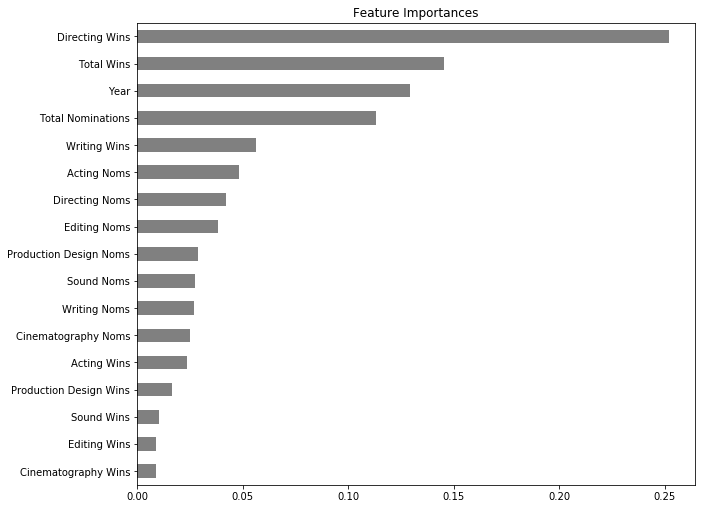

In [384]:
# Let's take a look at the feature importances
estimator = scores['estimator'][0]

importances = pd.Series(estimator.feature_importances_, xtrain.columns)

n = len(xtrain.columns)
plt.figure(figsize=(10,n/2))
plt.title('Feature Importances')
importances.sort_values().plot.barh(color='grey');
print(importances.sort_values(ascending=False))

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, 
                                 scoring='roc_auc', 
                                 cv='prefit', 
                                 n_iter=5, 
                                 random_state=42)

permuter.fit(X_val_encoded, y_val_log)
feature_names = X_val_encoded.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

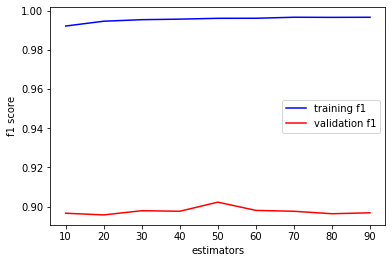

In [387]:
clf = RandomForestClassifier(max_depth=7, random_state=42, n_jobs=-1)

k=5
groups = train['Year']
depth = range(10, 100, 10)

train_scores, val_scores= validation_curve(
    clf, xtrain, ytrain,
    param_name='n_estimators',
    param_range=depth,
    scoring='roc_auc',
    cv=k,
    groups=groups)

plt.plot(depth, np.mean(train_scores, axis=1), color='blue', label='training roc auc')
plt.plot(depth, np.mean(val_scores, axis=1), color='red', label='validation roc auc')
plt.xlabel('estimators')
plt.ylabel('Roc Auc score')
plt.legend();

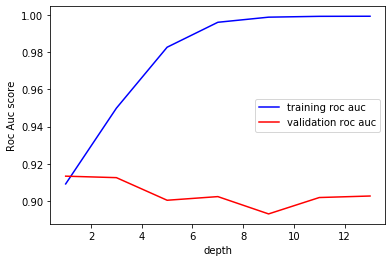

In [389]:
clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

k=5
groups = train['Year']
depth = range(1, 15, 2)

train_scores, val_scores= validation_curve(
    clf, xtrain, ytrain,
    param_name='max_depth',
    param_range=depth,
    scoring='roc_auc',
    cv=k,
    groups=groups)

plt.plot(depth, np.mean(train_scores, axis=1), color='blue', label='training roc auc')
plt.plot(depth, np.mean(val_scores, axis=1), color='red', label='validation roc auc')
plt.xlabel('depth')
plt.ylabel('Roc Auc score')
plt.legend();

In [392]:
clf = RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42, n_jobs=-1)

k=5
groups = train['Year']
scores = cross_validate(clf,
                        xtrain,
                        ytrain,
                        cv=k,
                        scoring='roc_auc',
                        groups=groups,
                        return_estimator=True)

print(f'ROC AUC Score for {k} folds', scores['test_score'])

ROC AUC Score for 5 folds [0.96586783 0.96514161 0.96691176 0.9265625  0.73789063]


In [393]:
from scipy.stats import randint, uniform

clf = RandomForestClassifier(random_state=42)


param_distributions={
    'n_estimators': randint(30, 500), 
    'max_features': uniform(), 
    'min_samples_leaf':  [1, 10, 100],    
    'max_depth': randint(1, 12)
}

k=3
groups = train['Year']

search = RandomizedSearchCV(
    clf,
    param_distributions=param_distributions,
    n_iter=5,
    cv=k,
    scoring='roc_auc',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(xtrain, ytrain, groups=groups)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    1.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.8s finished
C:\Users\Raul\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [394]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', search.best_score_)

Best hyperparameters {'max_depth': 4, 'max_features': 0.9428266750134604, 'min_samples_leaf': 10, 'n_estimators': 309}
Cross-validation Accuracy 0.9084707781661159


In [395]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,0.318813,0.033430,0.042886,0.011829,4,0.942827,10,309,"{'max_depth': 4, 'max_features': 0.94282667501...",0.957623,0.953358,0.813847,0.908471,0.066725,1,0.958446,0.948372,0.983409,0.963409,0.014728
4,0.233385,0.016207,0.023262,0.002066,11,0.541085,100,301,"{'max_depth': 11, 'max_features': 0.5410845563...",0.810768,0.765192,0.784688,0.786887,0.018690,2,0.754240,0.748745,0.837787,0.780257,0.040741
3,0.164227,0.004976,0.020279,0.004485,7,0.428475,100,185,"{'max_depth': 7, 'max_features': 0.42847460689...",0.810768,0.739206,0.783858,0.777932,0.029542,3,0.756038,0.746031,0.840052,0.780707,0.042162
0,0.097404,0.007021,0.011303,0.000470,11,0.458659,100,113,"{'max_depth': 11, 'max_features': 0.4586591452...",0.810768,0.716551,0.781924,0.769722,0.039452,4,0.757191,0.737687,0.828325,0.774401,0.038953
2,0.070147,0.001696,0.012300,0.004771,9,0.371051,100,83,"{'max_depth': 9, 'max_features': 0.37105066981...",0.794643,0.715219,0.781924,0.763891,0.034859,5,0.751662,0.738433,0.833356,0.774484,0.041978


In [400]:
from scipy.stats import randint, uniform

clf = XGBClassifier(random_state=42, base_score=0.5)


param_distributions={
    'n_estimators': randint(30, 500), 
#     'max_features': uniform(), 
    'min_child_weight':  [1, 10, 100],    
    'max_depth': randint(1, 12)
}

k=3
groups = train['Year']

search = RandomizedSearchCV(
    clf,
    param_distributions=param_distributions,
    n_iter=5,
    cv=k,
    scoring='roc_auc',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(xtrain, ytrain, groups=groups)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    7.7s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    8.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.5s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=...
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002AB42950B00>,
                                        '

In [401]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', search.best_score_)

Best hyperparameters {'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 124}
Cross-validation Accuracy 0.9125987433150073


In [402]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,0.100113,0.019350,0.002674,0.000480,7,10,124,"{'max_depth': 7, 'min_child_weight': 10, 'n_es...",0.966151,0.940432,0.830708,0.912599,0.058676,1,0.918623,0.922897,0.972881,0.938134,0.024632
3,0.254152,0.087757,0.002994,0.000002,5,10,206,"{'max_depth': 5, 'min_child_weight': 10, 'n_es...",0.967217,0.904184,0.830708,0.900847,0.055751,2,0.920319,0.925339,0.972881,0.939513,0.023684
4,0.501990,0.051285,0.002993,0.000815,8,1,210,"{'max_depth': 8, 'min_child_weight': 1, 'n_est...",0.944296,0.921908,0.811360,0.892689,0.058056,3,0.998745,0.999084,1.000000,0.999276,0.000530
2,0.163308,0.041254,0.003342,0.000476,2,1,113,"{'max_depth': 2, 'min_child_weight': 1, 'n_est...",0.960421,0.882729,0.829187,0.890906,0.053860,4,0.980563,0.979919,0.994869,0.985117,0.006901
0,0.584546,0.372477,0.007163,0.005193,3,10,377,"{'max_depth': 3, 'min_child_weight': 10, 'n_es...",0.967484,0.822361,0.830708,0.873606,0.066572,5,0.920963,0.927442,0.972881,0.940429,0.023099


In [29]:
rawgglobes = pd.read_csv('Projectdata/golden_globes.csv', encoding='latin-1')

rawgglobes.sample(20)

,Year,Category,Nominee,Won?
2128,1995,Best Performance by an Actor in a Mini-Series ...,"Garner, James in Breathing Lessons",no
3830,1981,Best Performance by an Actress In A Supporting...,"Arnaz, Lucie in Jazz Singer, The",no
1744,1998,Best Mini-Series Or Motion Picture Made for Te...,12 Angry Men,no
2521,1991,Best Motion Picture - Drama,Avalon,no
1298,2001,Best Performance by an Actress In A Supporting...,"Zeta-Jones, Catherine in Traffic",no
1804,1997,Best Performance by an Actress In A Supporting...,"Hershey, Barbara in Portrait Of a Lady, The",no
4489,1976,Best Original Score - Motion Picture,"Man Who Would Be King, TheComposed by Jarre, M...",no
5795,1965,Best Director - Motion Picture,"Cacoyannis, Michael for Zorba The Greek",no
1150,2002,Best Motion Picture - Comedy Or Musical,Shrek,no
530,2007,Best Performance by an Actress in a Motion Pic...,"Knowles, Beyoncé in Dreamgirls",no


In [30]:
rttninfo = pd.read_csv('Projectdata/movie_info.tsv', delimiter='\t')

rttninfo.sample(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
973,1264,The Super centers on the mysterious disappeara...,R,Mystery and Suspense,Stephan Rick,NaN,"Oct 19, 2018","Dec 18, 2018",NaN,NaN,90 minutes,NaN
1121,1446,In this comedy from Austin Powers director Jay...,PG-13,Comedy,Jay Roach,John Hamburg|Jim Herzfeld,"Oct 6, 2000","Mar 6, 2001",$,"164,454,835",108 minutes,Universal Pictures
1146,1476,"In this witty comedy set in 1920s Paris, an ar...",R,Art House and International|Comedy|Drama,Alan Rudolph,Alan Rudolph|Jon Bradshaw|John Bradshaw,"Jan 1, 1988","Sep 17, 2002",NaN,NaN,126 minutes,NaN
237,308,"In this occult obscurity, an old hillbilly nam...",NR,Horror,NaN,NaN,NaN,NaN,NaN,NaN,75 minutes,NaN
1328,1718,"Adonis Johnson Creed (Michael B. Jordan), the ...",PG-13,Drama,Ryan Coogler,Ryan Coogler|Aaron Covington,"Nov 25, 2015","Mar 1, 2016",$,"81,157,671",132 minutes,Warner Bros.


In [31]:
bom = pd.read_csv('Projectdata/boxoffice.csv')
bom.head(20)

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avengers: Endgame,BV,857190335,2019
2,3,Avatar,Fox,760507625,2009
3,4,Black Panther,BV,700059566,2018
4,5,Avengers: Infinity War,BV,678815482,2018
5,6,Titanic,Par.,659363944,1997
6,7,Jurassic World,Uni.,652270625,2015
7,8,Marvel's The Avengers,BV,623357910,2012
8,9,Star Wars: The Last Jedi,BV,620181382,2017
9,10,Incredibles 2,BV,608581744,2018
